 # Machine Learning LAB 1
 Academic Year 2021/22, P. Zanuttigh, U. Michieli, F. Barbato, D. Shenaj, G. Rizzoli

The notebook contains some simple tasks to be performed about classification and regression. Complete **all** the required code sections and answer to **all** the questions.

### IMPORTANT 1: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebook!


### IMPORTANT 2: Place your name and ID number. Also recall to save the file as Surname_Name_LAB1.ipynb . Notebooks without name will be discarded.

**Student name**: Fatima Rabia Yapicioglu<br>
**ID Number**: 2049536


# 1) Classification of Music genre

### Dataset description

A music genre is a conventional category that identifies pieces of music as belonging to a shared tradition or set of conventions. It is to be distinguished from musical form and musical style. The features extracted from these songs can help the machine to assing them to the two genres. 

This dataset is a subset of the dataset provided [here](https://www.kaggle.com/insiyeah/musicfeatures), containing only the data regarding the classical and metal genres.

### We consider 3 features for the classification

1) **tempo**, the speed at which a passage of music is played, i.e., the beats per minute of the musical piece<br>
2) **chroma_stft**, [mean chromagram activation on Short-Time Fourier Transform](https://librosa.org/doc/0.7.0/generated/librosa.feature.chroma_stft.html)<br>
3) **spectral_centroid**, Indicates where the "center of mass" of the spectrum is located, i.e., it is the weighted average of the frequency transform<br>


We first import all the packages that are needed.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv

import numpy as np
import scipy as sp
import sklearn as sl
import pandas as pd
from scipy import stats
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import accuracy_score

# Perceptron
Firstly we will implement the perceptron algorithm and use it to learn a halfspace.

**TO DO** Set the random seed, you can use your ID (matricola) or any other number! Try to make various tests changing the seed.

In [2]:
IDnumber = 2049536 #YOUR_ID , try also to change the seed to see the impact of random initialization on the results
np.random.seed(IDnumber)

Load the dataset and then split in training set and test set (the training set is typically larger, you can use a 75% tranining 25% test split) after applying a random permutation to the datset.

A) Load dataset and perform permutation

In [3]:
# Load the dataset
filename = 'data/music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',')
music_dataset = pd.read_csv('data/music.csv')

header = next(music) # skip first line
print(f"Header: {header}\n")

dataset = np.array(list(music))
print(f"Data shape: {dataset.shape}\n")
print("Dataset Example:")
print(dataset[:10,...])

X = dataset[:,:-1].astype(float) #columns 0,1,2 contain the features
Y = dataset[:,-1].astype(int)    # last column contains the labels

Y = 2*Y-1                        # for the perceptron classical--> -1, metal-->1
m = dataset.shape[0]
print("\nNumber of samples loaded:", m)
permutation = np.random.permutation(m) # random permutation

X = X[permutation]
Y = Y[permutation]

Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset Example:
[['92.28515625' '0.22373830597598895' '2192.798091164326' '0']
 ['161.4990234375' '0.2841730455239421' '1534.0649775815205' '0']
 ['143.5546875' '0.20811288763962318' '1396.8242648287155' '0']
 ['95.703125' '0.31289954089595506' '1680.0882644413368' '0']
 ['123.046875' '0.25857228884109024' '1173.6583080518985' '0']
 ['67.99958881578948' '0.22521197942744986' '715.1893204778178' '0']
 ['95.703125' '0.2840176228179304' '1184.632142061296' '0']
 ['89.10290948275862' '0.2563949682674902' '1358.897902739857' '0']
 ['99.38401442307692' '0.2614892978768399' '1372.8258066922585' '0']
 ['184.5703125' '0.2899787266101455' '1953.0485341566464' '0']]

Number of samples loaded: 200


We are going to classify class "1" (metal) vs class "0" (classical)

B) **TO DO** Divide the data into training set and test set (75% of the data in the first set, 25% in the second one)

In [4]:
music_dataset = music_dataset.sample( frac=1 )
music_dataset.head(5)

,tempo,chroma_stft,spectral_centroid,label
36,95.703125,0.319468,1712.446076,0
191,123.046875,0.433960,3237.533909,1
127,95.703125,0.438489,2683.416292,1
19,129.199219,0.190957,1063.153306,0
153,112.347147,0.432488,2198.534549,1


In [5]:
# Divide in training and test: make sure that your training set
# contains at least 10 elements from class 1 and at least 10 elements
# from class -1! If it does not, modify the code so to apply more random
# permutations (or the same permutation multiple times) until this happens.
# IMPORTANT: do not change the random seed.


# m_test needs to be the number of samples in the test set
m_training = music_dataset.iloc[:int((len(music_dataset)*75)/100),:]

# m_test needs to be the number of samples in the test set
m_test = music_dataset.iloc[int((len(music_dataset)*75)/100):,:]

In [6]:
print(len(m_training),len(m_test))

150 50


In [7]:
#Let's make sure that we have at least 10 elements from class 1 and at least 10 elements from class 0

print("number of 1s in training set", len(m_training[ m_training['label']==1 ]))
print("number of 0s in training set", len(m_training[ m_training['label']==0 ]))

print("number of 1s in training set", len(m_test[ m_test['label']==1 ]))
print("number of 0s in training set", len(m_test[ m_test['label']==0 ]))

#So, we have enough number of samples from each class

number of 1s in training set 77
number of 0s in training set 73
number of 1s in training set 23
number of 0s in training set 27


In [8]:


# X_training = instances for training set
X_training = m_training.iloc[:,:3]
#Y_training = labels for the training set
Y_training = m_training.iloc[:,3:]

# X_test = instances for test set
X_test = m_test.iloc[:,:3]
# Y_test = labels for the test set
Y_test = m_test.iloc[:,3:]

print(X_training)
print(Y_training) # to make sure that Y_training contains both 1 and -1
print(m_test)

print("\nNumber of classical instances in test:", np.sum(Y_test==0))
print("Number of metal instances in test:", np.sum(Y_test==1))

print("Shape of training set: " + str(X_training.shape))
print("Shape of test set: " + str(X_test.shape))

          tempo  chroma_stft  spectral_centroid
36    95.703125     0.319468        1712.446076
191  123.046875     0.433960        3237.533909
127   95.703125     0.438489        2683.416292
19   129.199219     0.190957        1063.153306
153  112.347147     0.432488        2198.534549
..          ...          ...                ...
61   103.359375     0.294135        1302.662455
32   172.265625     0.260483        1340.270643
10   103.359375     0.222324        1494.115744
126  151.999081     0.552581        2877.354754
84   112.347147     0.215064        1360.408354

[150 rows x 3 columns]
     label
36       0
191      1
127      1
19       0
153      1
..     ...
61       0
32       0
10       0
126      1
84       0

[150 rows x 1 columns]
          tempo  chroma_stft  spectral_centroid  label
50    99.384014     0.277865        1490.034810      0
73   107.666016     0.253793        1751.271417      0
80    83.354335     0.257275        1559.721852      0
108  123.046875     0.44

We add a 1 in front of each sample so that we can use a vector in homogeneous coordinates to describe all the coefficients of the model. This can be done with the function $hstack$ in $numpy$.

In [9]:
# Add a 1 to each sample (homogeneous coordinates)

x_training = np.hstack((np.ones((len(m_training),1)),X_training))
x_test = np.hstack((np.ones((len(m_test),1)),X_test))

print("Training set in homogeneous coordinates:")
print(X_training[:10])

Training set in homogeneous coordinates:
          tempo  chroma_stft  spectral_centroid
36    95.703125     0.319468        1712.446076
191  123.046875     0.433960        3237.533909
127   95.703125     0.438489        2683.416292
19   129.199219     0.190957        1063.153306
153  112.347147     0.432488        2198.534549
106   86.132812     0.479849        2807.988285
13   135.999178     0.293142        1932.858343
65   135.999178     0.266760        1371.283566
196  112.347147     0.491915        1983.264314
184  172.265625     0.443969        2644.707345


**TO DO** Now complete the function *perceptron*. Since the perceptron does not terminate if the data is not linearly separable, your implementation should return the desired output (see below) if it reached the termination condition seen in class or if a maximum number of iterations have already been run, where one iteration corresponds to one update of the perceptron weights. In case the termination is reached because the maximum number of iterations have been completed, the implementation should return **the best model** seen up to now.

The input parameters to pass are:
- $X$: the matrix of input features, one row for each sample
- $Y$: the vector of labels for the input features matrix X
- $max\_num\_iterations$: the maximum number of iterations for running the perceptron

The output values are:
- $best\_w$: the vector with the coefficients of the best model
- $best\_error$: the *fraction* of misclassified samples for the best model

In [10]:
# A template is provided, but feel free to build a different implementation
from random import random, randint

learning_rate=0.5

def perceptron_update(current_w, x, y, prediction):
    # Place in this function the update rule of the perceptron algorithm
    current_w[0] += learning_rate * (y - prediction) * x[0]
    current_w[1] += learning_rate * (y - prediction) * x[1]
    current_w[2] += learning_rate * (y - prediction) * x[2]
 
    new_w = current_w

    return new_w

def perceptron(X, Y, max_num_iterations):
    # Place in this function the main section of the perceptron algorithm
    
    #init the algorith with w=0, use a best_w variable to keep track of the best solution
    curr_w = np.zeros(3)
    best_w = curr_w
    num_samples = len(m_training)
    best_error = 0
    
    index_misclassified = -1 #will be ovewritten
    num_misclassified = 0 #will be ovewritten
    
    
    #main loop continue until all samples correctly classified or max # iterations reached
    num_iter = 1
    
    while (num_iter < max_num_iterations):
        
        index_misclassified = -1
        num_misclassified = 0
        
        # avoid working always on the same sample, you can use a random permutation or randomize the choice of misclassified
        
        predictions=np.array(np.zeros(X.shape[0]))
        activation=np.dot(X,curr_w.T) 
       
        
        X.sample(frac=1) #randomize our samples
        
        for i in range(num_samples):
            
            if activation[i] >= 0.5:
                predictions[i]=1
            else:
                predictions[i]=0 
                
            
        random_ith = randint(0,X.shape[0]-1)
        random_ith = int(random_ith)
        
        
        if ( predictions[random_ith] != Y.values[random_ith] ):
            index_misclassified = random_ith
            #update  error count, keep track of best solution
            num_misclassified += 1
            # check if the i-th randomly selected sample is misclassified
            
            # store the number of randomly classified samples and the 
            # index of at least one of them
            
            x2 = X.iloc[random_ith,:]
            y2 = Y.iloc[random_ith,:]
            prediction_ith = predictions[random_ith]

        
            #call update function using a misclassifed sample
            new_w = perceptron_update(curr_w, x2, y2, prediction_ith)
            best_w = new_w
            best_error = num_misclassified/num_samples
            
        num_iter += 1
    
    return best_w, best_error


Now we use the implementation above of the perceptron to learn a model from the training data using 100 iterations and print the error of the best model we have found.

In [11]:
#now run the perceptron for 100 iterations
w_found, error = perceptron(X_training,Y_training, 100)
print("Training Error of perpceptron (100 iterations): " + str(error))

Training Error of perpceptron (100 iterations): 0.006666666666666667


**TO DO** use the best model $w\_found$ to predict the labels for the test dataset and print the fraction of misclassified samples in the test set (the test error that is an estimate of the true loss).

In [12]:
#now use the w_found to make predictions on test dataset

def predict(inputs): 
    
        summation = np.dot(inputs, w_found) 
        
        if summation > 0.5:
            activation = 1
        else:
            activation = 0            
        return activation

# PLACE YOUR CODE to compute the number of errors

def test(X_test):
    
        num_errors = 0
        
        for i in range(0,len(X_test)):
            y_pred = predict(X_test.iloc[i,:])

            if ( Y_test.values[i] != y_pred ):
                num_errors +=1

        true_loss_estimate = num_errors/len(m_test)  # error rate on the test set
        return true_loss_estimate    
    
true_loss_estimate =  test(X_test)

#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Test Error of perpceptron (100 iterations): \n" + str(true_loss_estimate))

Test Error of perpceptron (100 iterations): 
0.54


**TO DO** **[Answer the following]** What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples)? Explain what you observe. [Write the answer in this cell]

**ANSWER QUESTION 1**

The training error that I've computed is 0.006 and the test error that I:'ve computed is 0.46. Obviously, the training error is less than the test error we found, beacuse the test data is a kind of that our model has not been trained on it before. Model is able to answer more accurately to the data samples, but there is a probability for overfitting and the model may not be able to answer accretly to the out of sample data that has never seen before, because it couldn't generalize well. Therefore there may be more misclassified samples in test data than the ones we found in the training data.

**TO DO** Copy the code from the last 2 cells above in the cell below and repeat the training with 3000 iterations. Then print the error in the training set and the estimate of the true loss obtained from the test set.

In [13]:
#now run the perceptron for 3000 iterations here!

# PLACE YOUR CODE
w_found, error = perceptron(X_training,Y_training, 3000)
print("Training Error of perpceptron (3000 iterations): " + str(error))

# PLACE YOUR CODE
true_loss_estimate =  test(X_test)
print("Test Error of perpceptron (3000 iterations): " + str(true_loss_estimate))

Training Error of perpceptron (3000 iterations): 0.006666666666666667
Test Error of perpceptron (3000 iterations): 0.3


**TO DO** [Answer the following] What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples) when running for a larger number of iterations ? Explain what you observe and compare with the previous case. [Write the answer in this cell]

**ANSWER QUESTION 2**

When we train our model with a larger number of iterations, we can easily observe that the test error is reducing, because the model was able learn from train data and generalize it better. In the initial case the test error was 0.42 and when we train our model with 3000 iterations it reduced to 0.32, therefore it is better. But we should be careful about setting a quite large number of iterations and overfitting to the training data, therefore finding the optimum number of iteratons is significant.

# Logistic Regression
Now we use logistic regression, exploiting the implementation in Scikit-learn, to predict labels. We will also plot the decision region of logistic regression.

We first load the dataset again.

In [14]:
# Load the dataset
filename = 'data/music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',')

header = next(music) # skip first line
print(f"Header: {header}\n")

dataset = np.array(list(music))
print(f"Data shape: {dataset.shape}\n")
print("Dataset Example:")
print(dataset[:10,...])

X = dataset[:,:-1].astype(float) # columns 0,1,2 contain the features
Y = dataset[:,-1].astype(int)    # last column contains the labels

Y = 2*Y-1                        # for the perceprton classical--> -1, metal-->1
m = dataset.shape[0]
print("\nNumber of samples loaded:", m)
permutation = np.random.permutation(m) # random permutation

X = X[permutation]
Y = Y[permutation]

Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset Example:
[['92.28515625' '0.22373830597598895' '2192.798091164326' '0']
 ['161.4990234375' '0.2841730455239421' '1534.0649775815205' '0']
 ['143.5546875' '0.20811288763962318' '1396.8242648287155' '0']
 ['95.703125' '0.31289954089595506' '1680.0882644413368' '0']
 ['123.046875' '0.25857228884109024' '1173.6583080518985' '0']
 ['67.99958881578948' '0.22521197942744986' '715.1893204778178' '0']
 ['95.703125' '0.2840176228179304' '1184.632142061296' '0']
 ['89.10290948275862' '0.2563949682674902' '1358.897902739857' '0']
 ['99.38401442307692' '0.2614892978768399' '1372.8258066922585' '0']
 ['184.5703125' '0.2899787266101455' '1953.0485341566464' '0']]

Number of samples loaded: 200


**TO DO** As for the previous part, divide the data into training and test (75%-25%) and add a 1 as first component to each sample.

In [15]:
#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.
#IMPORTANT: do not change the random seed.
music_dataset = music_dataset.sample( frac=1 )
music_dataset.head(5)
# m_test needs to be the number of samples in the test set
m_training = music_dataset.iloc[:int((len(music_dataset)*75)/100),:]

# m_test needs to be the number of samples in the test set
m_test = music_dataset.iloc[int((len(music_dataset)*75)/100):,:]

# X_training = instances for training set
X_training = m_training.iloc[:,:3]
#Y_training = labels for the training set
Y_training = m_training.iloc[:,3:]

# X_test = instances for test set
X_test = m_test.iloc[:,:3]
# Y_test = labels for the test set
Y_test = m_test.iloc[:,3:]


print("Number of samples in the test set:\n", m_test)
print("\nNumber of classical instances in test:", np.sum(Y_test==-1))
print("Number of metal instances in test:", np.sum(Y_test==1))

print("\nShape of training set: \n" + str(X_training.shape))
print("Shape of test set: " + str(X_test.shape))

Number of samples in the test set:
           tempo  chroma_stft  spectral_centroid  label
164   99.384014     0.467757        2442.645580      1
43   135.999178     0.187032         794.918486      0
136  112.347147     0.555233        2699.573852      1
69   123.046875     0.305244        1803.621756      0
168  123.046875     0.440829        2955.272094      1
88   234.907670     0.270478        1216.293762      0
61   103.359375     0.294135        1302.662455      0
162  143.554688     0.516368        2375.812595      1
163  123.046875     0.483494        2723.615095      1
199  117.453835     0.469571        2760.319304      1
196  112.347147     0.491915        1983.264314      1
188  123.046875     0.480056        2029.736704      1
56   161.499023     0.387949        2411.938718      0
147  135.999178     0.469079        2254.281419      1
3     95.703125     0.312900        1680.088264      0
171  151.999081     0.517662        2138.076591      1
173  135.999178     0.446211 

To define a logistic regression model in Scikit-learn use the instruction

$linear\_model.LogisticRegression(C=1e5)$

($C$ is a parameter related to *regularization*, a technique that
we will see later in the course. Setting it to a high value is almost
as ignoring regularization, so the instruction above corresponds to the
logistic regression you have seen in class.)

To learn the model you need to use the $fit(...)$ instruction and to predict you need to use the $predict(...)$ function. See the Scikit-learn documentation for how to use it.

**TO DO** Define the logistic regression model, then learn the model using the training set and predict on the test set. Then print the fraction of samples misclassified in the training set and in the test set.

In [16]:
#part on logistic regression for 2 classes
logreg = linear_model.LogisticRegression(C=1e5) #a large C disables regularization

#learn from training set

clf = logreg.fit(X_training, Y_training)

#predict on training set

y_pred_train = clf.predict(X_training)

#print the error rate = fraction of misclassified samples
error_rate_training = 0

acc = accuracy_score(Y_training, y_pred_train)

error_rate_training = 1 - acc

print("Error rate on training set: "+str(error_rate_training))

y_pred_test = clf.predict(X_test)

#print the error rate = fraction of misclassified samples
error_rate_test = 0

acc = accuracy_score(Y_test, y_pred_test)

error_rate_test = 1 - acc

print("Error rate on test set: " + str(error_rate_test))

Error rate on training set: 0.0
Error rate on test set: 0.040000000000000036


/Users/rabiayapicioglu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


**TO DO** Now pick two features and restrict the dataset to include only two features, whose indices are specified in the $feature$ vector below. Then split into training and test. Which features are you going to select ?

In [17]:
# to make the plot we need to reduce the data to 2D, so we choose two features
features_list = ['tempo', 'chroma_stft', 'spectral_centroid']

index_feature1 = 0
index_feature2 = 1

features = [index_feature1, index_feature2]

feature_name0 = features_list[features[0]]
feature_name1 = features_list[features[1]]

filename = 'data/music.csv'
dataset = pd.read_csv('data/music.csv')

dataset.sample(frac = 1)

X = dataset.iloc[:,:-1].astype(float) #columns 0,1,2 contain the features
Y = dataset.iloc[:,-1].astype(int)    # last column contains the labels


X_reduced = X.iloc[:,features]

X_training = X_reduced.iloc[:int((len(music_dataset)*75)/100),:]
#Y_training = labels for the training set
Y_training = Y.iloc[:int((len(music_dataset)*75)/100)]

# X_test = instances for test set
X_test = X_reduced.iloc[int((len(music_dataset)*75)/100):,:]
# Y_test = labels for the test set
Y_test = Y.iloc[int((len(music_dataset)*75)/100):]

print(X_training.shape)
print(Y_training.shape)

print(X_test.shape)
print(Y_test.shape)

(150, 2)
(150,)
(50, 2)
(50,)


Now learn a model using the training data and measure the performances.

In [18]:
# learning from training data

error_rate_test = 0

#part on logistic regression for 2 classes
logreg = linear_model.LogisticRegression() #a large C disables regularization

#learn from training set
clf = logreg.fit(X_training, Y_training)

#predict on training set

y_pred = clf.predict(X_test)

#print the error rate = fraction of misclassified samples

error_rate_test = 1 - accuracy_score(Y_test, y_pred)

#print the error rate = fraction of misclassified samples

print("Error rate on test set: " + str(error_rate_test))

Error rate on test set: 0.56


**TO DO** [Answer the following] Which features did you select and why ? Compare the perfromances with the ones of the case with all the 3 features and comment about the results. [Write the answer in this cell]

**ANSWER QUESTION 3**

Feature engineering and choosing the proper features from the plays a significant role when training the model with the relevant data. Feeding the model with the irrelevant data and features may cause model to underfit the data. Therefore when I use all the columns model's generalization capability such that it produces 0.04 error rate on the test data which is 0.09, I experimented to pick for two columns and tried to train model only with these two, and I observed that they more relevant to the training of my model.

If everything is ok, the code below uses the model in $logreg$ to plot the decision region for the two features chosen above, with colors denoting the predicted value. It also plots the points (with correct labels) in the training set. It makes a similar plot for the test set.

<ipython-input-19-5f8857c3cc04>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


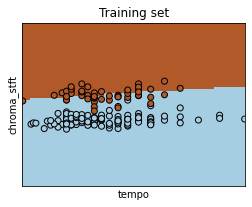

<ipython-input-19-5f8857c3cc04>:36: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


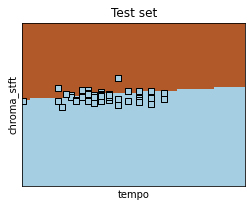

In [19]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# NOTICE: This visualization code has been developed for a "standard" solution of the notebook, 
# it could be necessary to make some fixes to adapt to your implementation

h = .02  # step size in the mesh
x_min, x_max = X_reduced.iloc[:, 0].min() - .5, X_reduced.iloc[:, 0].max() + .5
y_min, y_max = X_reduced.iloc[:, 1].min() - .5, X_reduced.iloc[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_training.iloc[:, 0], X_training.iloc[:, 1], c=Y_training, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Training set')

plt.show()

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the test points 
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired, marker='s')
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Test set')

plt.show()

# 2) Linear Regression on the Boston House Price dataset

### Dataset description: 

The Boston House Price Dataset involves the prediction of a house price in thousands of dollars given details about the house and its neighborhood.

The dataset contains a total of 500 observations, which relate 13 input features to an output variable (house price).

The variable names are as follows:

CRIM: per capita crime rate by town.

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of nonretail business acres per town.

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX: nitric oxides concentration (parts per 10 million).

RM: average number of rooms per dwelling.

AGE: proportion of owner-occupied units built prior to 1940.

DIS: weighted distances to five Boston employment centers.

RAD: index of accessibility to radial highways.

TAX: full-value property-tax rate per $10,000.

PTRATIO: pupil-teacher ratio by town.

B: 1000*(Bk – 0.63)2 where Bk is the proportion of blacks by town.

LSTAT: % lower status of the population.

MEDV: Median value of owner-occupied homes in $1000s.
    

In [20]:
#needed if you get the IPython/javascript error on the in-line plots
%matplotlib nbagg  

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats

             CRIM          ZN       INDUS       CHAS         NOX          RM  \
count  499.000000  499.000000  499.000000  499.00000  499.000000  499.000000   
mean     3.663099   11.486974   11.149419    0.07014    0.554484    6.282385   
std      8.651501   23.450438    6.896293    0.25564    0.116664    0.706007   
min      0.009060    0.000000    0.460000    0.00000    0.385000    3.561000   
25%      0.082865    0.000000    5.160000    0.00000    0.448500    5.882000   
50%      0.268380    0.000000    9.690000    0.00000    0.538000    6.208000   
75%      3.695030   12.500000   18.100000    0.00000    0.624000    6.622000   
max     88.976200  100.000000   27.740000    1.00000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  499.000000  499.000000  499.000000  499.000000  499.000000  499.000000   
mean    68.431062    3.811375    9.659319  409.851703   18.434870  356.126493   
std     28.300146    2.114674    8.7

<IPython.core.display.Javascript object>


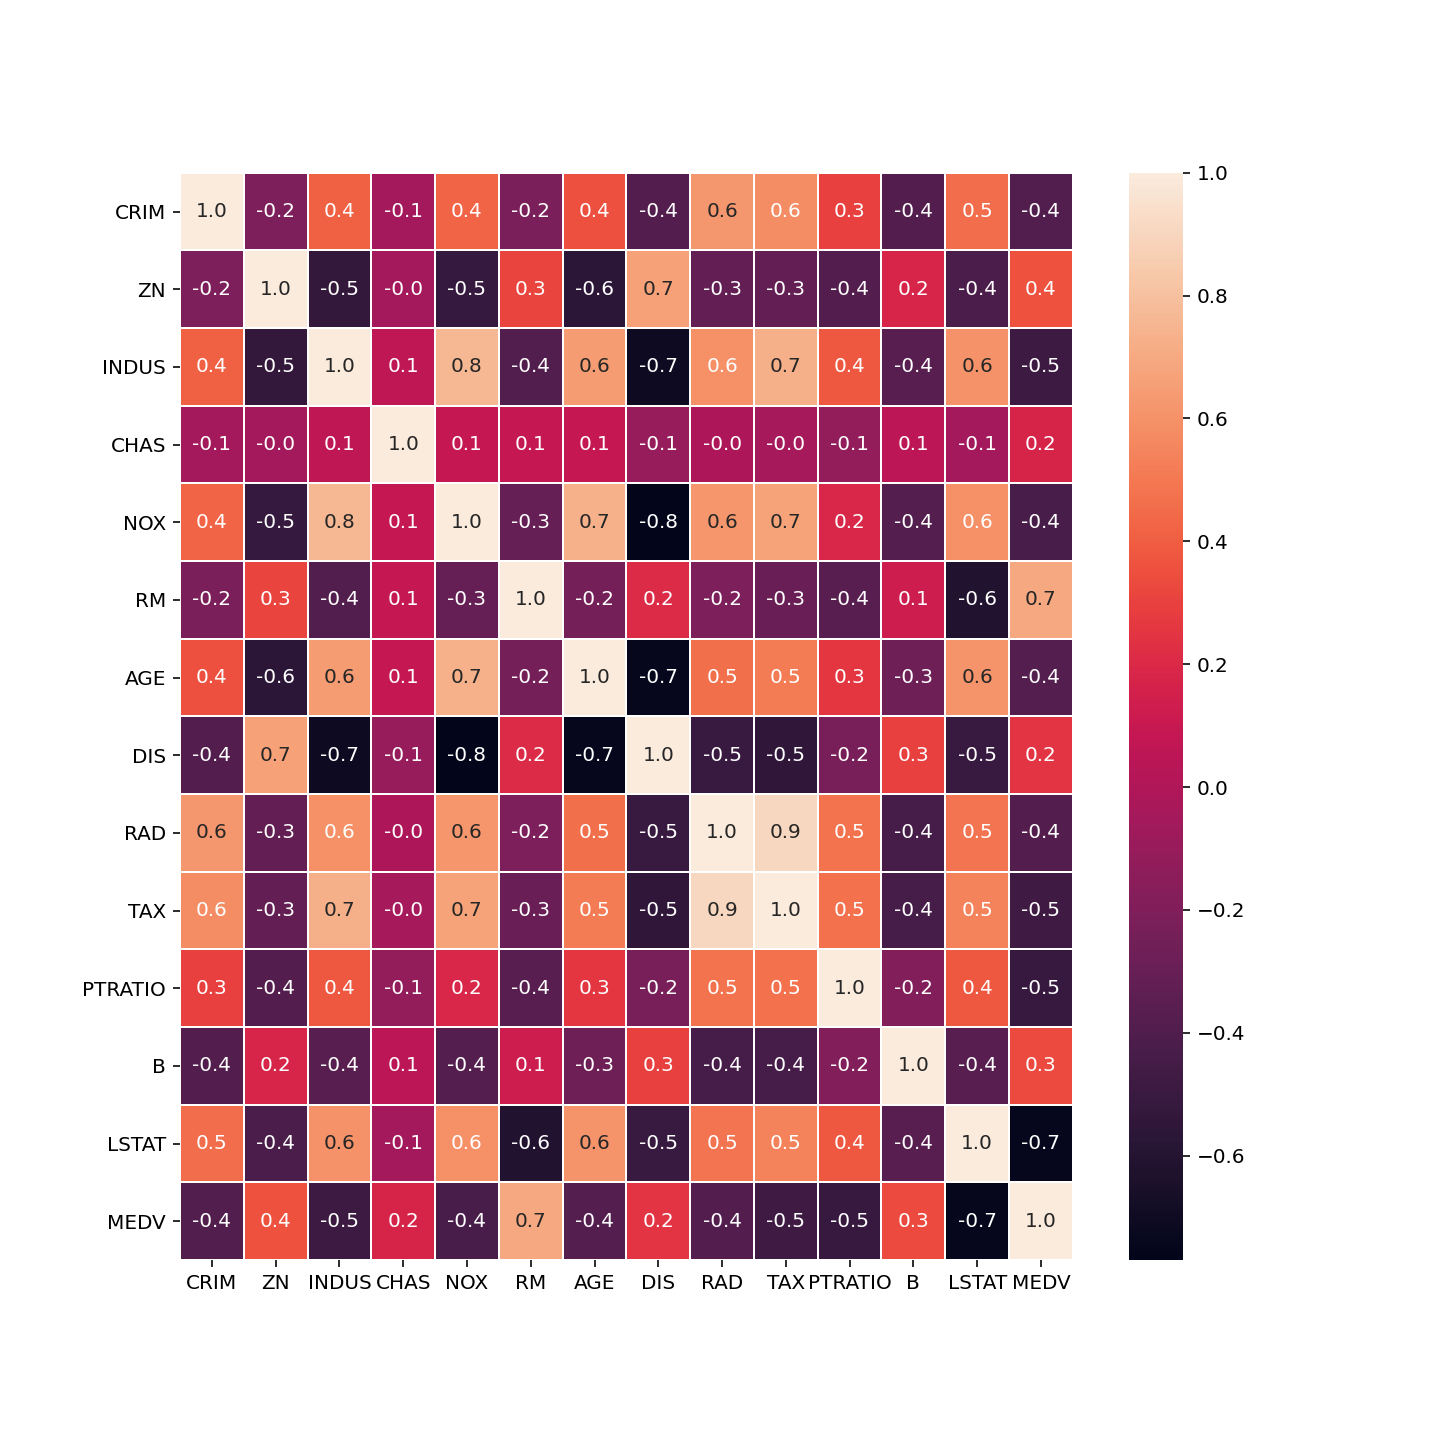

In [21]:
#Import Data: Load the data from a .csv file
import seaborn as sns 

filename = "data/house.csv"
#Data = np.genfromtxt(filename, delimiter=';',skip_header=1)

#A quick overview of data, to inspect the data you can use the method describe()


#dataDescription = stats.describe(Data)

#print(dataDescription)
#print ("Shape of data array: " + str(Data.shape))
#for more interesting visualization: use Panda!
dataset = pd.read_csv(filename, delimiter=';',skiprows=[1])

print(dataset.describe())

f,ax=plt.subplots( figsize=(10,10))
sns.heatmap( dataset.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)
plt.show()


# Split data in training and test sets



Given $m$ total data, denote with $m_{t}$ the part used for training. Keep $m_t$ data as training data, and $m_{test}:= m-m_{t}$. For instance one can take $m_t=0.7m$ of the data as training and $m_{test}=0.3m$ as testing. Let us define as define

$\bullet$ $S_{t}$ the training data set

$\bullet$ $S_{test}$ the testing data set


The reason for this splitting is as follows:

TRAINING DATA: The training data are used to compute the empirical loss
$$
L_S(h) = \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
which is used to estimate $h$ in a given model class ${\cal H}$.
i.e. 
$$
\hat{h} = {\rm arg\; min}_{h \in {\cal H}} \, L_S(h)
$$

TESTING DATA: The test data set can be used to estimate the performance of the final estimated model
$\hat h_{\hat d_j}$ using:
$$
L_{{\cal D}}(\hat h_{\hat d_j}) \simeq \frac{1}{m_{test}} \sum_{ z_i \in S_{test}} \ell(\hat h_{\hat d_j},z_i)
$$


**TO DO**: split the data in training and test sets (70%-30%)

In [22]:
#get number of total samples
num_total_samples = dataset.shape[0]

print ("Total number of samples: ", num_total_samples)

m_t = int(num_total_samples*.7)

print ("Cardinality of Training Set: ", m_t)

#shuffle the data
dataset = dataset.sample( frac = 1 )

#training data 

X_training = X_reduced.iloc[:int((len(music_dataset)*70)/100),:]
#Y_training = labels for the training set
Y_training = Y.iloc[:int((len(music_dataset)*70)/100)]

print ("Training input data size: ", X_training.shape)
print ("Training output data size: ", Y_training.shape)

#test data, to be used to estimate the true loss of the final model(s)
X_test = X_reduced.iloc[int((len(music_dataset)*70)/100):,:]
# Y_test = labels for the test set
Y_test = Y.iloc[int((len(music_dataset)*70)/100):]

print ("Test input data size: ", X_test.shape)
print ("Test output data size: ", Y_test.shape)

Total number of samples:  499
Cardinality of Training Set:  349
Training input data size:  (140, 2)
Training output data size:  (140,)
Test input data size:  (60, 2)
Test output data size:  (60,)


# Data Normalization
It is common practice in Statistics and Machine Learning to scale the data (= each variable) so that it is centered (zero mean) and has standard deviation equal to 1. This helps in terms of numerical conditioning of the (inverse) problems of estimating the model (the coefficients of the linear regression in this case), as well as to give the same scale to all the coefficients.

In [23]:
# scale the data

# standardize the input matrix
from sklearn import preprocessing
# the transformation is computed on training data and then used on all the 3 sets
scaler = preprocessing.StandardScaler().fit(X_training) 

np.set_printoptions(suppress=True) # sets to zero floating point numbers < min_float_eps
X_training = scaler.transform(X_training)
print ("Mean of the training input data:", X_training.mean(axis=0))
print ("Std of the training input data:",X_training.std(axis=0))

X_test = scaler.transform(X_test) # use the same transformation on test data
print ("Mean of the test input data:", X_test.mean(axis=0))
print ("Std of the test input data:", X_test.std(axis=0))

Mean of the training input data: [0. 0.]
Std of the training input data: [1. 1.]
Mean of the test input data: [0.06027095 1.30679666]
Std of the test input data: [0.75268091 0.45359742]


# Model Training 

The model is trained (= estimated) minimizing the empirical error
$$
L_S(h) := \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
When the loss function is the quadratic loss
$$
\ell(h,z) := (y - h(x))^2
$$
we define  the Residual Sum of Squares (RSS) as
$$
RSS(h):= \sum_{z_i \in S_{t}} \ell(h,z_i) = \sum_{z_i \in S_{t}} (y_i - h(x_i))^2
$$ so that the training error becomes
$$
L_S(h) = \frac{RSS(h)}{m_t}
$$

We recal that, for linear models we have $h(x) = <w,x>$ and the Empirical error $L_S(h)$ can be written
in terms of the vector of parameters $w$ in the form
$$
L_S(w) = \frac{1}{m_t} \|Y - X w\|^2
$$
where $Y$ and $X$ are the matrices whose $i-$th row are, respectively, the output data $y_i$ and the input vectors $x_i^\top$.


 **TO DO:** compute the linear regression coefficients using np.linalg.lstsq from scikitlear 
 

In [24]:
#compute linear regression coefficients for training data
import math
from scipy.linalg import lstsq

#add a 1 at the beginning of each sample for training, and testing (use homogeneous coordinates)
m_training = X_training.shape[0]
X_trainingH = np.hstack((np.ones((m_training,1)),X_training)) # H: in homogeneous coordinates

m_test = X_test.shape[0]
X_testH = np.hstack((np.ones((m_test,1)),X_test))  # H: in homogeneous coordinates

# Compute the least-squares coefficients using linalg.lstsq
w_np, RSStr_np, rank_Xtr, sv_Xtr =   np.linalg.lstsq( X_trainingH, Y_training, rcond=None)
print("LS coefficients with numpy lstsq:", w_np)

# compute Residual sums of squares 
p, RSStr_hand, rnk, s = lstsq(X_trainingH, Y_training)

print("RSS with numpy lstsq: ", RSStr_np)
print("Empirical risk with numpy lstsq:", RSStr_np/m_training)

LS coefficients with numpy lstsq: [ 0.28571429 -0.0456535   0.41286999]
RSS with numpy lstsq:  [4.62657844]
Empirical risk with numpy lstsq: [0.03304699]


## Data prediction 

Compute the output predictions on both training and test set and compute the Residual Sum of Squares (RSS). 

**TO DO**: Compute these quantities on  training and test sets.

In [25]:
#compute predictions on training and test
w_np, RSStr_np, rank_Xtr, sv_Xtr =   np.linalg.lstsq( X_trainingH, Y_training, rcond=None)

def predict(new_data,w_np):
    
    prediction = np.zeros(len(new_data))
    
    for i in range(0,len(new_data)):
        summation = np.dot(new_data[i,:],w_np[:2])
        if summation >= 0.05:
            prediction[i]=1
        else:
            prediction[i]=0
    return prediction

def loss_points(y_true,y_pred):
    
    loss_points_res = list(np.zeros(len(y_pred)))
    number_of_misclassifications = 0
    RSS=0
    
    for i in range(0,len(y_true)):
        if( y_true.values[i]!=y_pred[i] ):
            RSS += math.pow((y_pred[i]-y_true.values[i]),2)
            #print(RSS)
            number_of_misclassifications +=1
            loss_points_res.append(y_true.values[i])
    return RSS,loss_points_res,number_of_misclassifications
    
    
def loss_estimated(y_true,y_pred):
    
    RSS,lp,nm = loss_points(y_true,y_pred)
    res = RSS
    resovermtest = nm / m_test
   
    return res, resovermtest
    

#what about the loss for points in the test data?
prediction_results_train = predict( X_training, w_np)
Res_train, resovermtest_train = loss_estimated( Y_training, prediction_results_train)
resovermtest_train = abs(1 - resovermtest_train)

prediction_results_test = predict( X_test, w_np)
Res_test, resovermtest_test = loss_estimated( Y_test, prediction_results_test)
resovermtest_test = abs(1 - resovermtest_test)

prediction_results = predict( X_training, w_np)
print("RSS on train data:",  Res_train)
print("Loss estimated from train data:", resovermtest_train)

prediction_results_test = predict( X_test, w_np)
print("RSS on test data:",  Res_test)
print("Loss estimated from test data:", resovermtest_test)

RSS on train data: 73.0
Loss estimated from train data: 0.21666666666666656
RSS on test data: 41.0
Loss estimated from test data: 0.31666666666666665


### QUESTION 4: Comment on the results you get and on the difference between the train and test errors.

Loss estimated from train data that I've computed was 0.21 and the loss estimated from the test data that I've computed is 0.31, again it can be seen that the training error is less than the test error. If the model was successful at accurately predicting the data samples then the residual sum of squares will be less which leads to less value of loss estimated from data. But the model was better at predictting training data so that it's loss is less than the test data's loss value. 

## Ordinary Least-Squares using scikit-learn
Another fast way to compute the LS estimate is through sklearn.linear_model (for this function homogeneous coordinates are not needed).

In [26]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# build the LinearRegression() model and train it
LinReg = LinearRegression().fit(X_training, Y_training)


print("Intercept:", LinReg.intercept_)
print("Least-Squares Coefficients:", LinReg.coef_)

# predict output values on training and test sets

LinReg.predict(X_test)

# return a prediction score based on the coefficient of determination
print("Measure on training data:", 1-LinReg.score(X_training, Y_training))


Intercept: 0.2857142857142856
Least-Squares Coefficients: [-0.0456535   0.41286999]
Measure on training data: 0.16193024524022537
